# Обробка сигналів - лабораторна робота 3

Частина 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import resample

## Завдання 0

Визначимо завгортку над FFT з numpy, яка повертатиме половинку з спектру.

In [2]:
def fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)

    freqs = np.fft.fftfreq(N, 1/fs)[:N//2]
    amplitudes = np.abs(fft_vals)[:N//2] / (N / 2)
    amplitudes[0] /= 2
    return freqs, amplitudes

## Завдання 1

In [3]:
T = 1
amplitude = 1
fs = 128

In [4]:
time = np.arange(0, T, 1/fs)

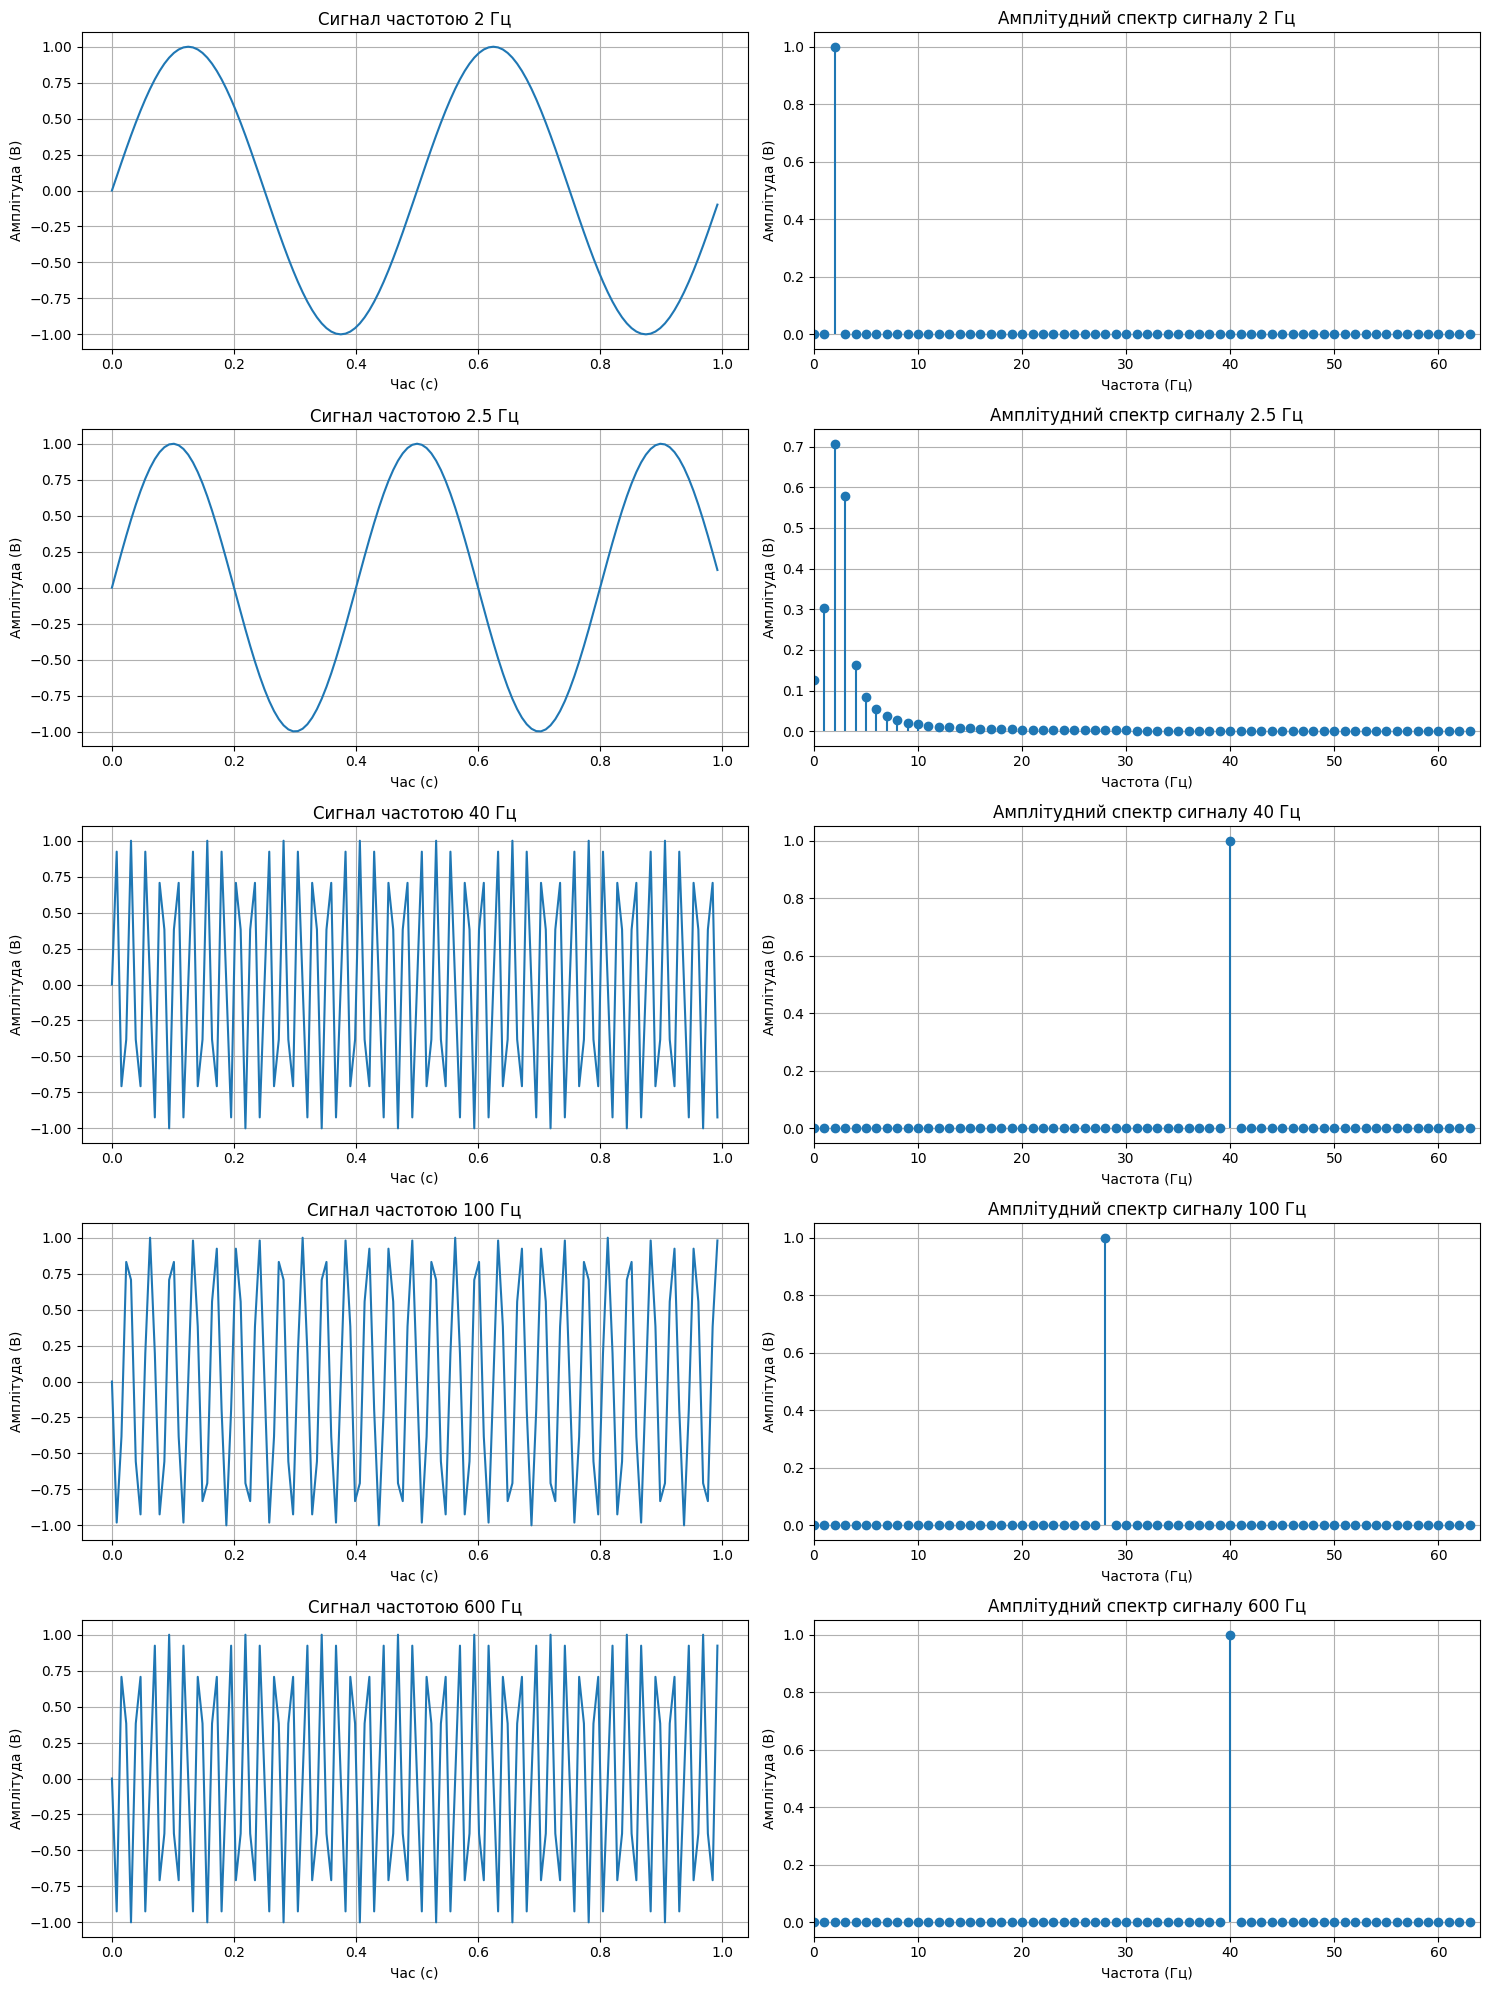

In [5]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
sin_freq = [2, 2.5, 40, 100, 600]
signals_1 = []

for i, f in enumerate(sin_freq):
    signal = amplitude * np.sin(2 * np.pi * f * time)
    freqs, amplitudes = fft(signal, fs)
    signals_1.append((time, fs, freqs, amplitudes))
    axes[i, 0].plot(time, signal)
    axes[i, 0].set_title(f'Сигнал частотою {f} Гц')
    axes[i, 0].set_xlabel('Час (с)')
    axes[i, 0].set_ylabel('Амплітуда (В)')
    axes[i, 0].grid(True)

    axes[i, 1].stem(freqs, amplitudes, basefmt=" ")
    axes[i, 1].set_title(f'Амплітудний спектр сигналу {f} Гц')
    axes[i, 1].set_xlabel('Частота (Гц)')
    axes[i, 1].set_ylabel('Амплітуда (В)')
    axes[i, 1].grid(True)
    axes[i, 1].set_xlim(0, fs/2)

plt.tight_layout()
plt.show()

Можемо побачити наступне:
* Сигнали-синусоїди з натуральною частотою виразилися через 1 коефіцієнт (1 спайк в графіку амплітудного спектру)
* Сигнал з частотою 2.5 Гц виражено через багато коефіцієнтів. Усе це через те, що 2.5 - не натуральне число, яке знаходиться через 2 і 3. Через природу FFT, не виходить виразити цю функцію через 1 коефіцієнт, стається спектральний leakage
* Відбувається аліасинг сигналів з частотами 40 та 600 Гц  


У цілому, все сходиться з тим, що мало би бути отримано теоретично.

### 1.1

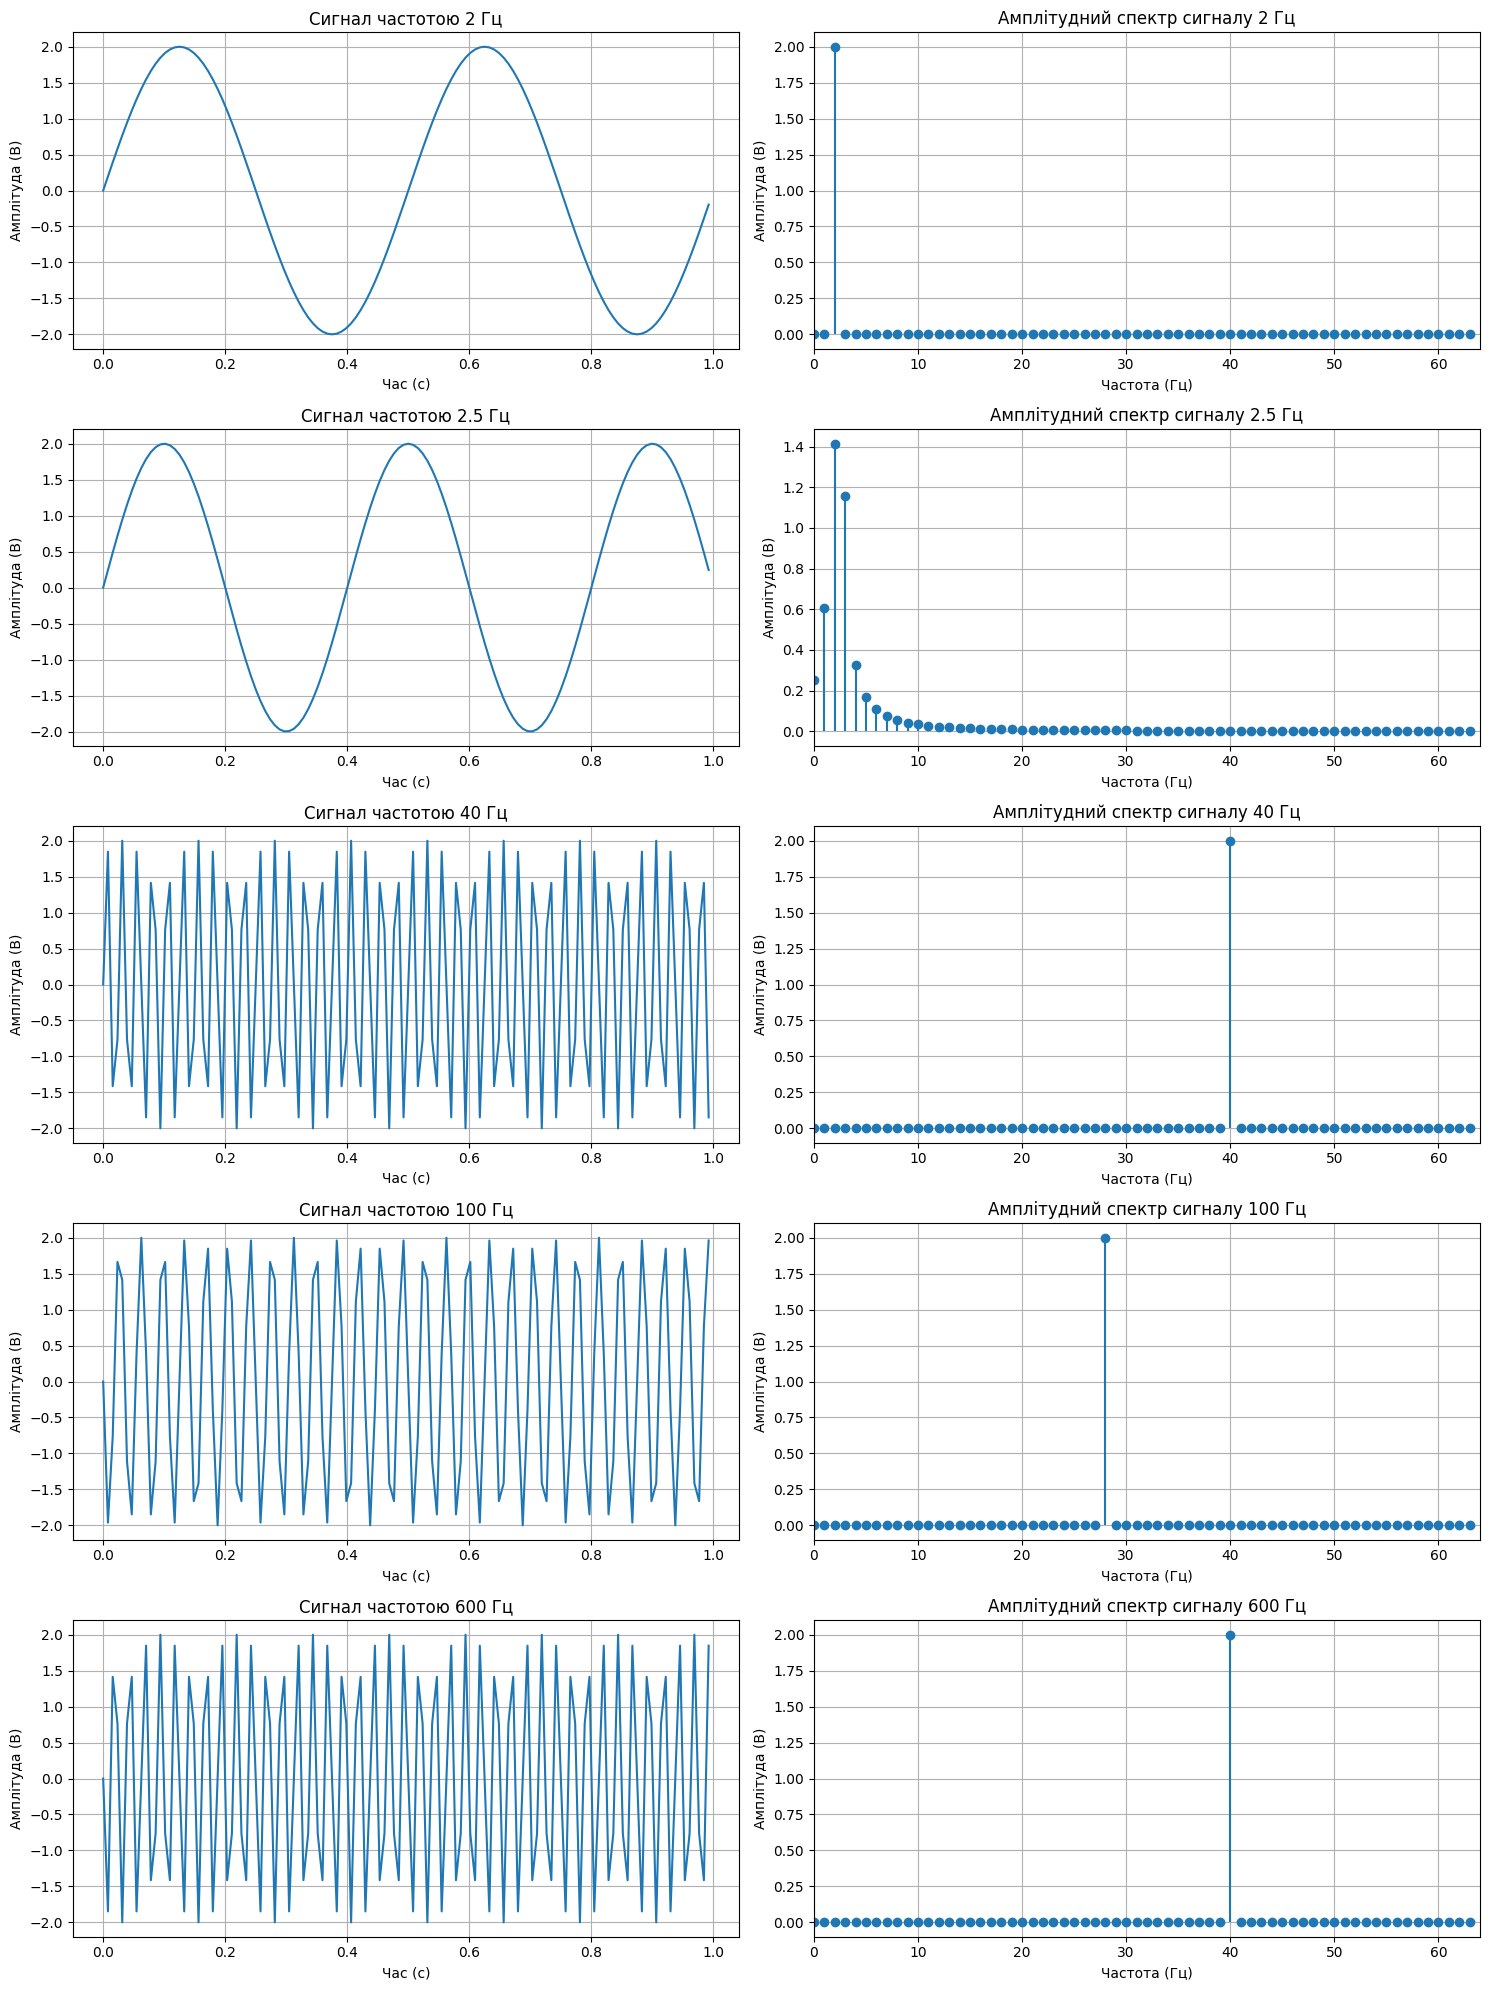

In [6]:
amplitude_2 = 2
signals_2 = []
axes = plt.subplots(5, 2, figsize=(15, 20))[1]
for i, f in enumerate(sin_freq):
    signal = amplitude_2 * np.sin(2 * np.pi * f * time)
    freqs, amplitudes = fft(signal, fs)
    signals_2.append((time, fs, freqs, amplitudes))
    axes[i, 0].plot(time, signal)
    axes[i, 0].set_title(f'Сигнал частотою {f} Гц')
    axes[i, 0].set_xlabel('Час (с)')
    axes[i, 0].set_ylabel('Амплітуда (В)')
    axes[i, 0].grid(True)
    axes[i, 1].stem(freqs, amplitudes, basefmt=" ")
    axes[i, 1].set_title(f'Амплітудний спектр сигналу {f} Гц')
    axes[i, 1].set_xlabel('Частота (Гц)')
    axes[i, 1].set_ylabel('Амплітуда (В)')
    axes[i, 1].grid(True)
    axes[i, 1].set_xlim(0, fs/2)
plt.tight_layout()

У порівнянні з графіком з першої частини, кожен коефіцієнт амплітудного спектру збільшився удвоє (як і було очікувано).

### 1.2

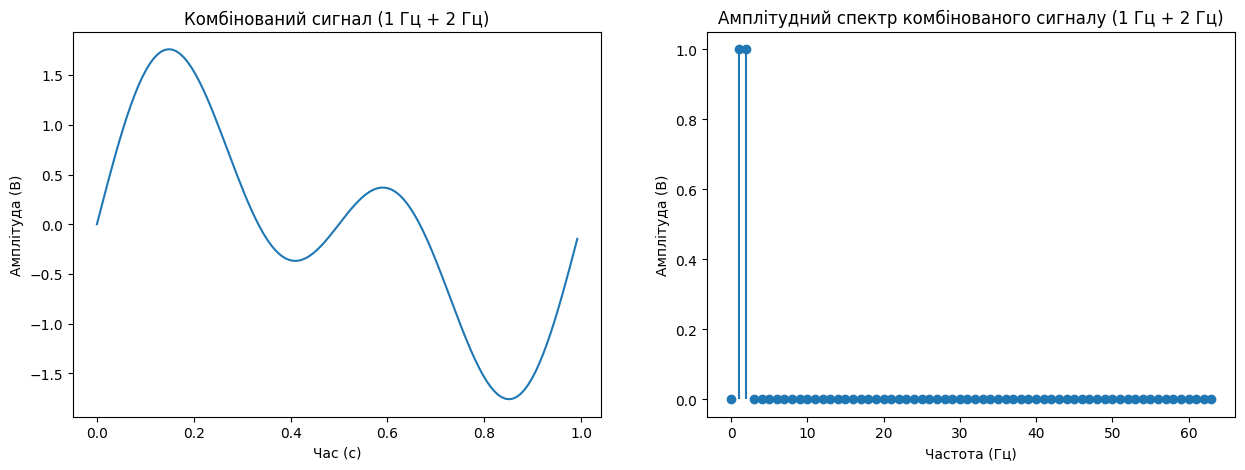

In [7]:
sin_1 = amplitude * np.sin(2 * np.pi * 1 * time)
sin_2 = amplitude * np.sin(2 * np.pi * 2 * time)
composite_signal = sin_1 + sin_2
composite_freqs, composite_amplitudes = fft(composite_signal, fs)
axes = plt.subplots(1, 2, figsize=(15, 5))[1]
axes[1].stem(composite_freqs, composite_amplitudes, basefmt=" ")
axes[1].set_title('Амплітудний спектр комбінованого сигналу (1 Гц + 2 Гц)')
axes[1].set_xlabel('Частота (Гц)')
axes[1].set_ylabel('Амплітуда (В)')
axes[0].plot(time, composite_signal)
axes[0].set_title('Комбінований сигнал (1 Гц + 2 Гц)')
axes[0].set_xlabel('Час (с)')
axes[0].set_ylabel('Амплітуда (В)')
plt.show()

Отримано очікуваний результат: наша функція тепер в ортогональному базисі отриманому через FFT виражається двома доданками, оскільки вхідний сигнал -- сума двох синусоїдальних, з різними частотами. Тому і отримано 2 коефіцієнти в амплітудному спектрі.

### 1.3

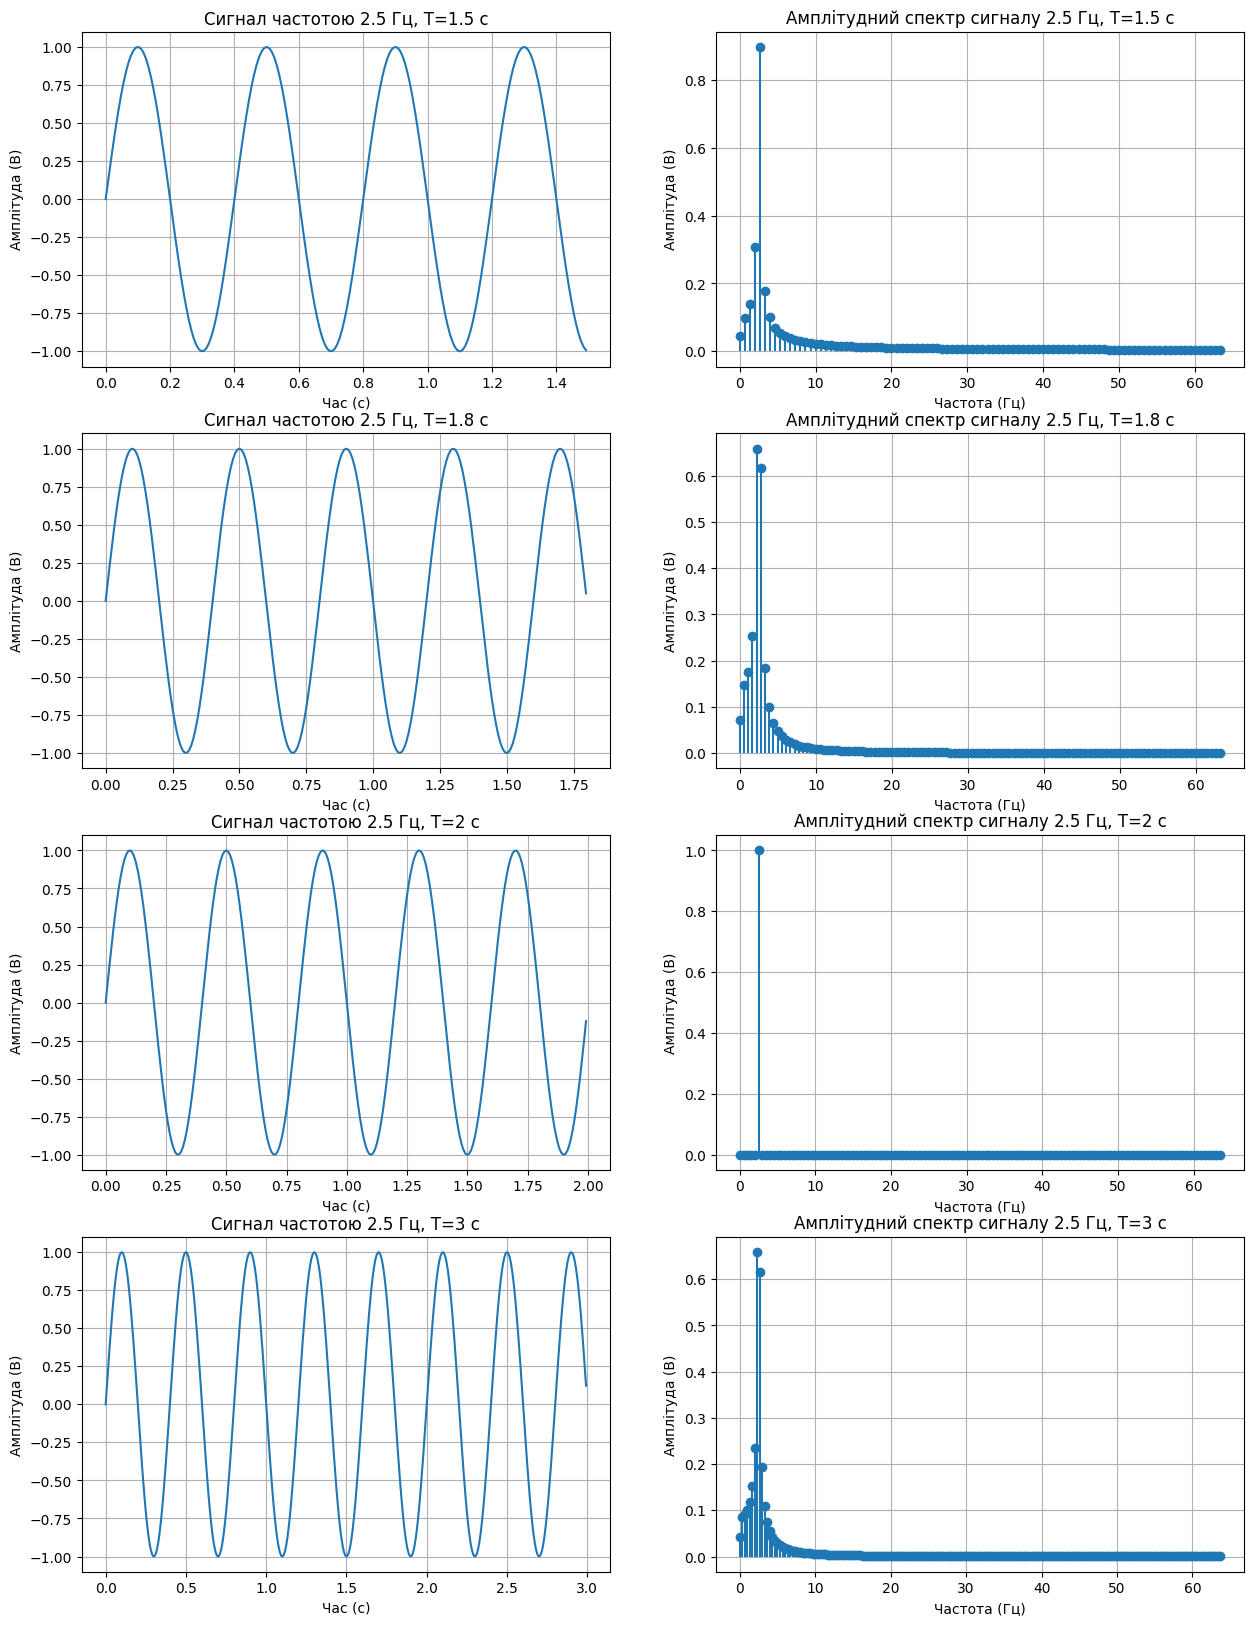

In [8]:
f = 2.5
times = [1.5, 1.8, 2, 3]
axes = plt.subplots(len(times), 2, figsize=(15, 5 * len(times)))[1]
for t in times:
    time_arr = np.arange(0, t, 1/fs)
    signal = amplitude * np.sin(2 * np.pi * f * time_arr)
    freqs, amplitudes = fft(signal, fs)
    axes[times.index(t), 0].plot(time_arr, signal)
    axes[times.index(t), 0].set_title(f'Сигнал частотою {f} Гц, T={t} с')
    axes[times.index(t), 0].set_xlabel('Час (с)')
    axes[times.index(t), 0].set_ylabel('Амплітуда (В)')
    axes[times.index(t), 0].grid(True)
    axes[times.index(t), 1].stem(freqs, amplitudes, basefmt=" ")
    axes[times.index(t), 1].set_title(f'Амплітудний спектр сигналу {f} Гц, T={t} с')
    axes[times.index(t), 1].set_xlabel('Частота (Гц)')
    axes[times.index(t), 1].set_ylabel('Амплітуда (В)')
    axes[times.index(t), 1].grid(True)

Можна зробити наступні висновки:
* Коли тривалість аналізованого сигналу не вміщує ціле число його періодів, стаєтсья попередньо згадане спектральне 
витікання. Це дуже добре видно на графіках з $T = [1.5, 1.8, 2.5]$.
* У випадку з $T = 2$, leakage - мінімальний. Для частоти 2.5 Гц, період становить $1/2.5 = 0.4 s$, тоді при $T = 2$, в сигнал входить ціле число періодів, $N = 2 / 0.4 = 5$. Тому на графіку і видно один чіткий пік коефіцієнтів. 

## Завдання 2

In [9]:
T = 10
fs = 256
freq_s1 = 10
freq_s2 = 100
time = np.arange(0, T, 1/fs)
time_double = np.arange(0, 2*T, 1/fs)

In [10]:
s1 = np.sin(2 * np.pi * freq_s1 * time)
s2 = np.sin(2 * np.pi * freq_s2 * time)

### 2.1

In [11]:
s1_s2 = s1 + s2

### 2.2, 2.3

In [12]:
double_s1_s2 = np.concatenate((2 * s1, 2 *s2))
double_s2_s1 = np.concatenate((2 * s2, 2 * s1))

In [13]:
signals = [(s1, 's1'), (s2, 's2'), (s1_s2, 's1 + s2'), (double_s1_s2, '2*s1, 2*s2'), (double_s2_s1, '2*s2, 2*s1')]

### Графіки

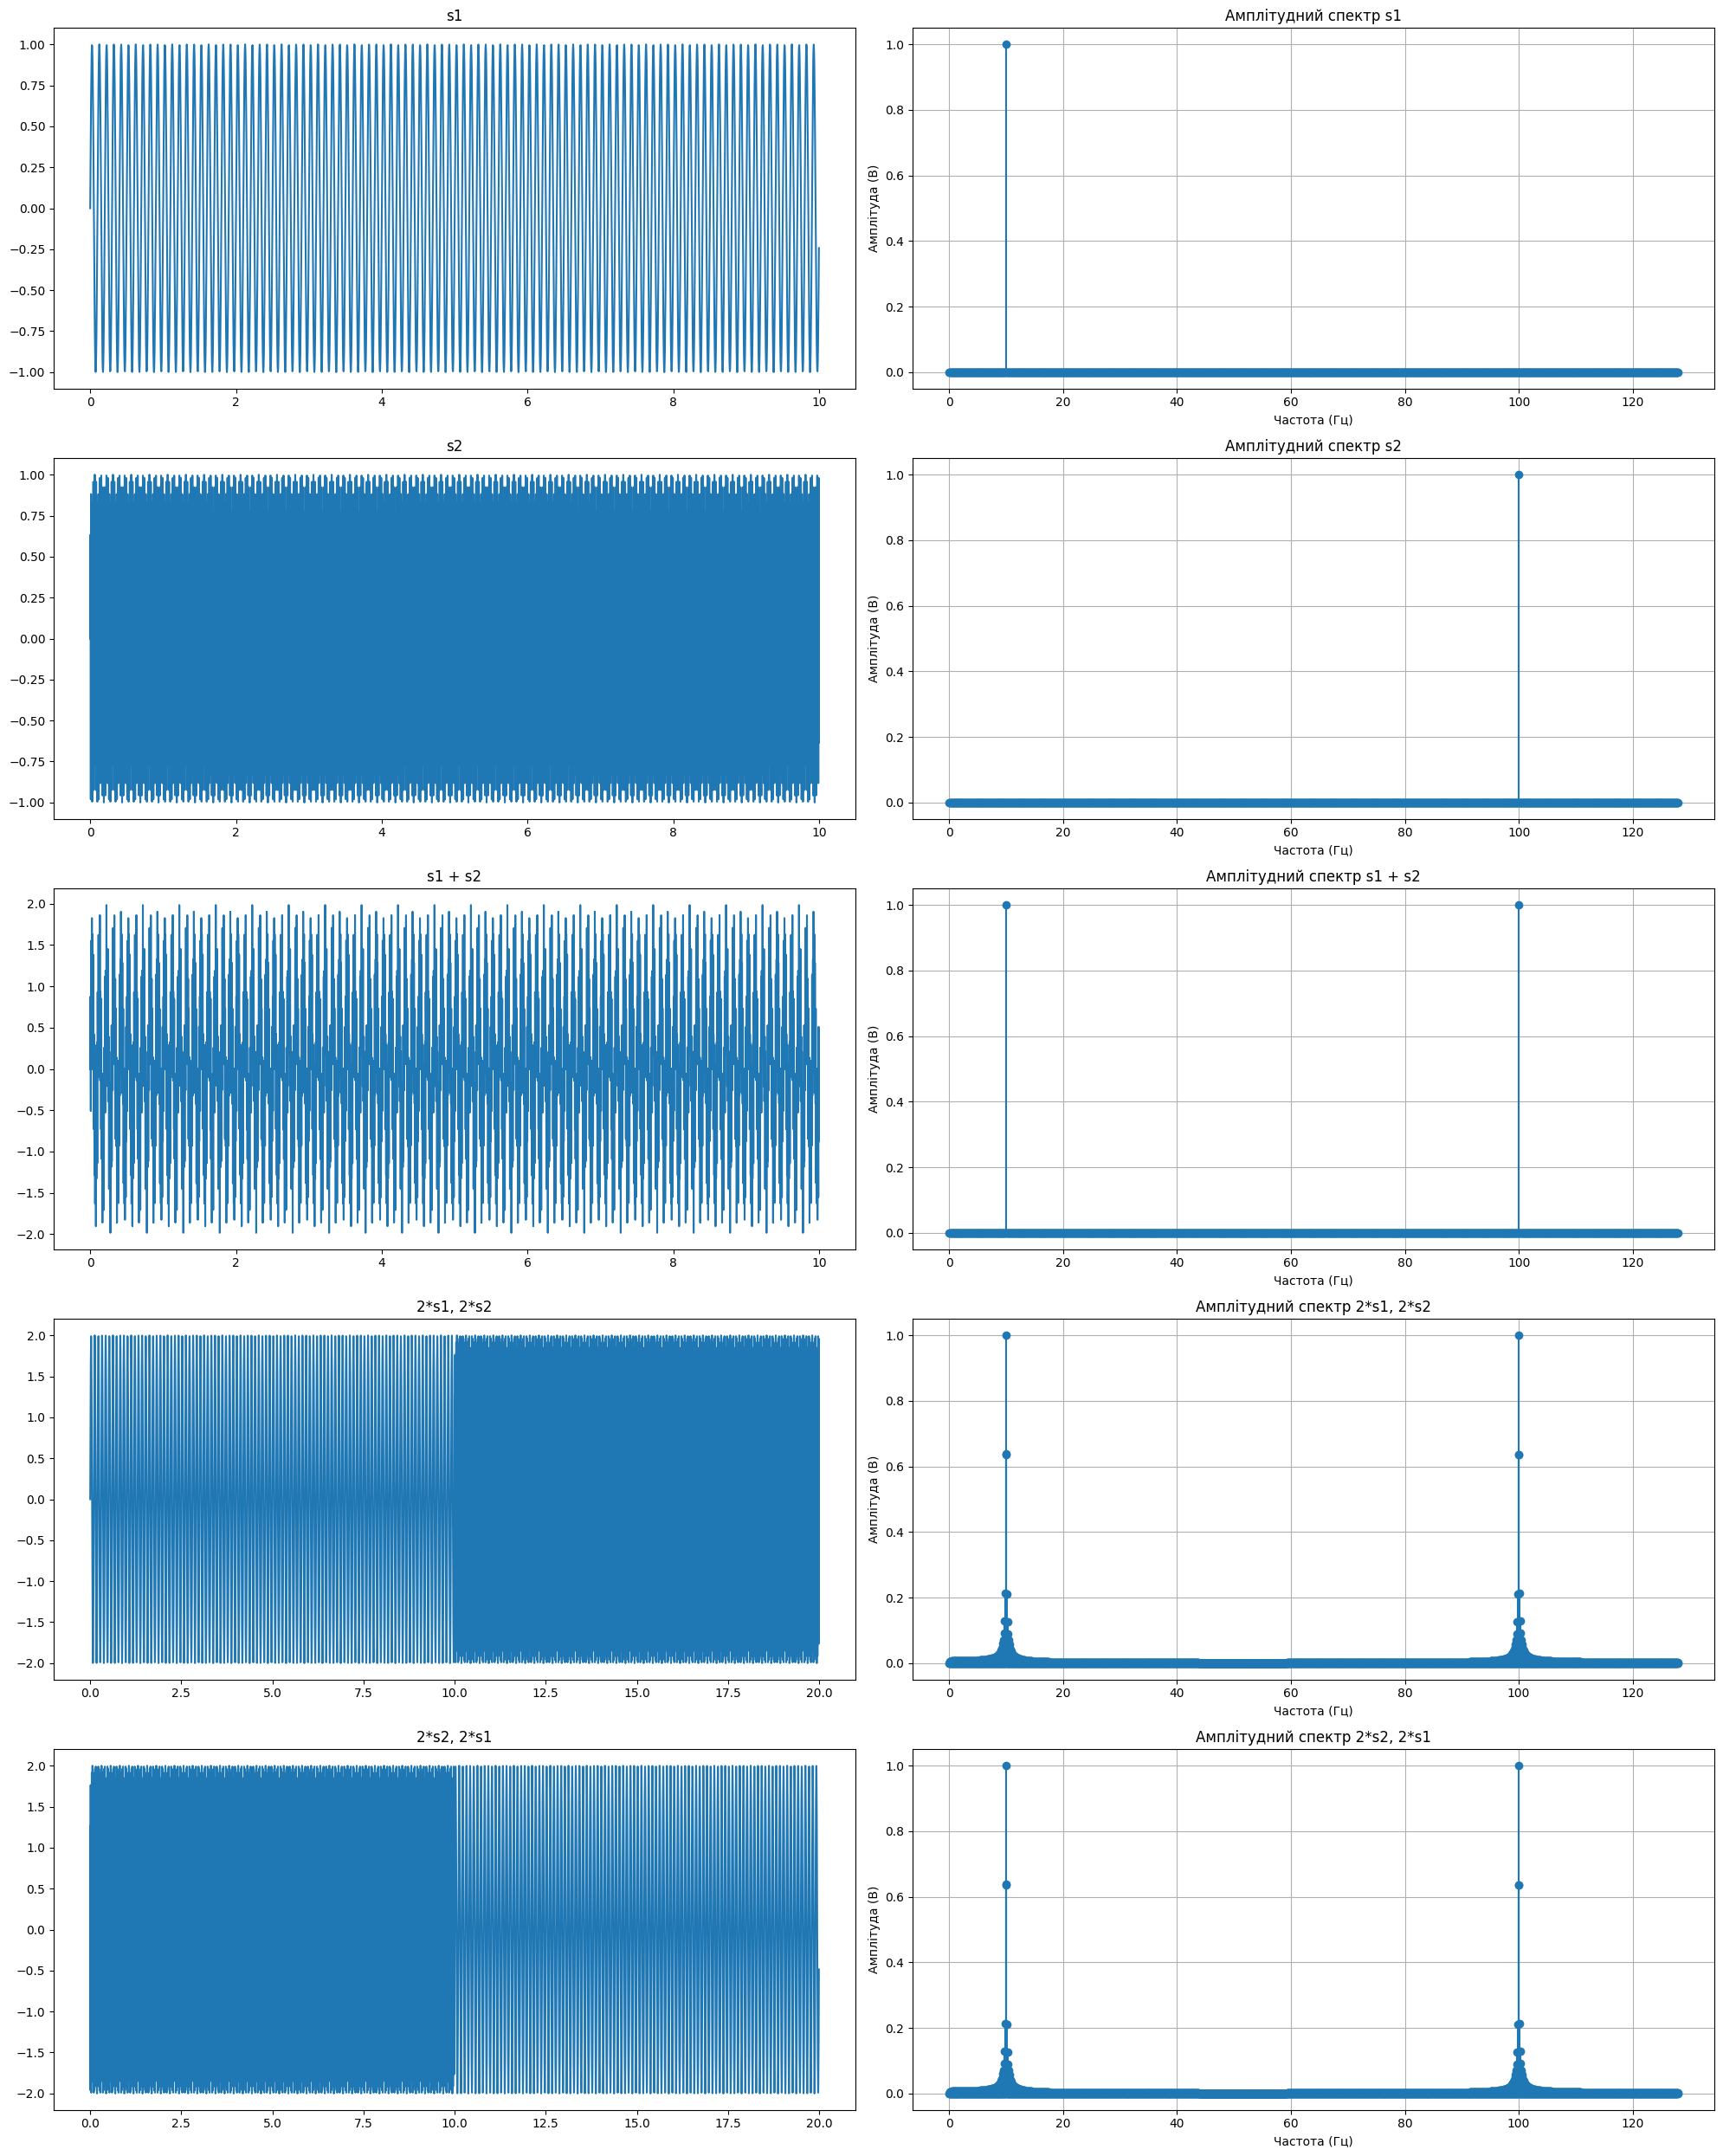

In [14]:
axes = plt.subplots(len(signals), 2, figsize=(20, 5 * len(signals)))[1]
for i, (signal, name) in enumerate(signals):
    axes[i, 0].plot(time if len(signal) == len(time) else time_double, signal)
    axes[i, 0].set_title(name)

    freqs, amplitudes = fft(signal, fs)
    axes[i, 1].stem(freqs, amplitudes, basefmt=" ")
    axes[i, 1].set_title(f'Амплітудний спектр {name}')
    axes[i, 1].set_xlabel('Частота (Гц)')
    axes[i, 1].set_ylabel('Амплітуда (В)')
    axes[i, 1].grid(True)
plt.tight_layout()

На графіку s1 + s2 (часовий ряд) видно складне коливання, де складно розрізнити точні частоти. У той же час, на графіку амплітудного спектру чітко видно з яких підсигналів складений цей сигнал. Це підтверджує експерименти з завдання 1.  

Щодо графіків з конкатинацією сигналів, можна знову побачити явище спектрального розтікання. Це відбуваєтсья через те, що з сигналу 1 до сигналу 2 відбувається різкий перехід на 10 секунді.  

Графіки амплітудних спектрів `2*s2, 2*s1` та `2*s1, 2*s2` збігаються, що показує властивість амплітудного спектру - грають роль коефіцієнти (які частоти присутні), а не коли вони з'являються.

З цього всього можна, зробити наступні висновки:
* Спектральний аналіз дає можливість розрізняти коливання. Навіть у складних випадках, графік амплітудного спектру explicitly чітко розділяє на вхідні синусоїдальні компоненти
* Стандартний амплітудний аналіз втрачає інформацію про час; це дуже добре видно на графіках `2*s2, 2*s1` та `2*s1, 2*s2`
* Для сигналів, де частота не змінюється з часом (s1 + s2), є пряма відповідність - отримується набір чітких піків.
* Для сигналів, де частота змінюється з часом (конкатинація), з'являються артефакти через різку зміну. Наприклад, спектральне розтікання 

## Завдання 5

In [15]:
T = 30
fs = 512
time = np.arange(0, T, 1/fs)
imp_vals = [0.05, 0.1, 1, 10, 20]

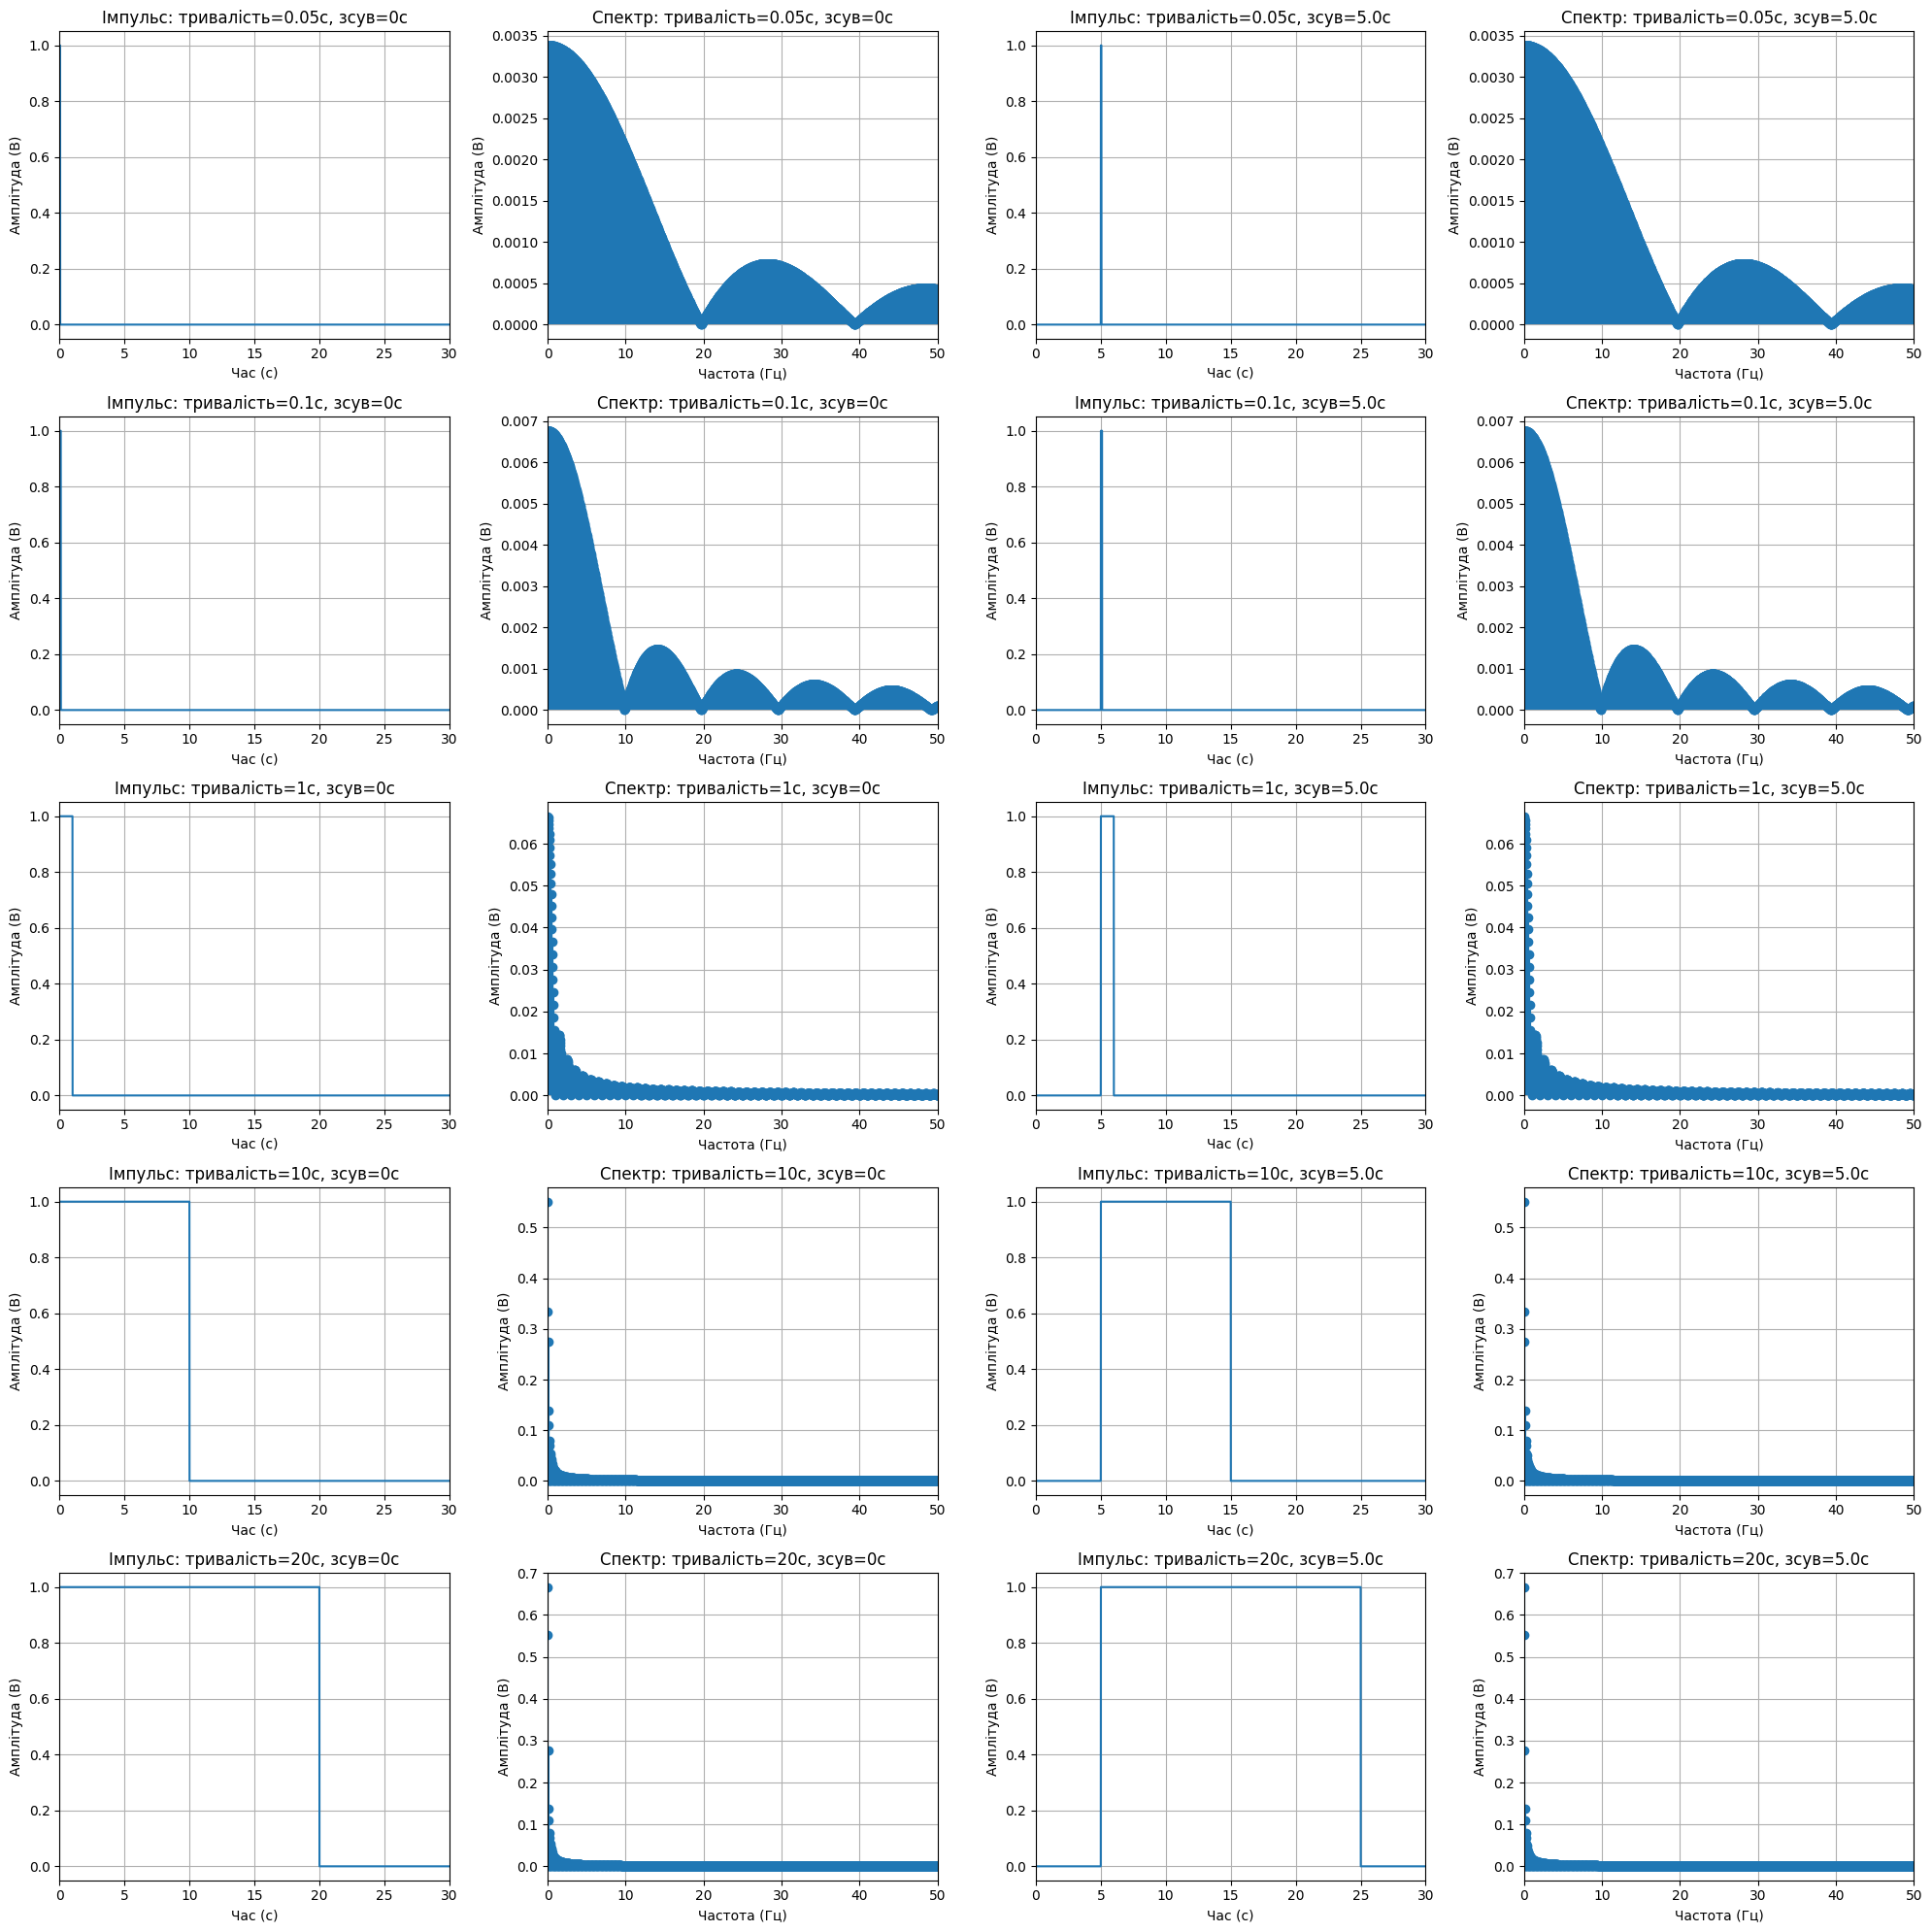

In [16]:
fig, axes = plt.subplots(len(imp_vals), 4, figsize=(20, 4 * len(imp_vals)))

for i, duration in enumerate(imp_vals):
    for j, shift in enumerate([0, 5.]):
        impulse = np.zeros_like(time)
        mask = (time >= shift) & (time < shift + duration)
        impulse[mask] = amplitude

        freqs, amplitudes = fft(impulse, fs)

        axes[i, j*2].plot(time, impulse)
        axes[i, j*2].set_title(f'Імпульс: тривалість={duration}с, зсув={shift}с')
        axes[i, j*2].set_xlabel('Час (с)')
        axes[i, j*2].set_ylabel('Амплітуда (В)')
        axes[i, j*2].grid(True)
        axes[i, j*2].set_xlim(0, 30)

        axes[i, j*2+1].stem(freqs, amplitudes, basefmt=" ")
        axes[i, j*2+1].set_title(f'Спектр: тривалість={duration}с, зсув={shift}с')
        axes[i, j*2+1].set_xlabel('Частота (Гц)')
        axes[i, j*2+1].set_ylabel('Амплітуда (В)')
        axes[i, j*2+1].grid(True)
        axes[i, j*2+1].set_xlim(0, 50)

plt.tight_layout()
plt.show()

З цих графіків видно те, що спектри для імпульсів зі зсувом ідентичні до спектрів без зсуву. Це все підтверджує властивіть перетворення Фур'є, а саме те, що зсув не змінює спектр, лише фазовий простір.

## Завдання 6

In [17]:
T = 1
fs = 128
amplitude = 1
f = 10

In [18]:
sin = amplitude * np.sin(2 * np.pi * f * time)
sin_noised = sin + np.random.normal(0, 0.1, len(sin))

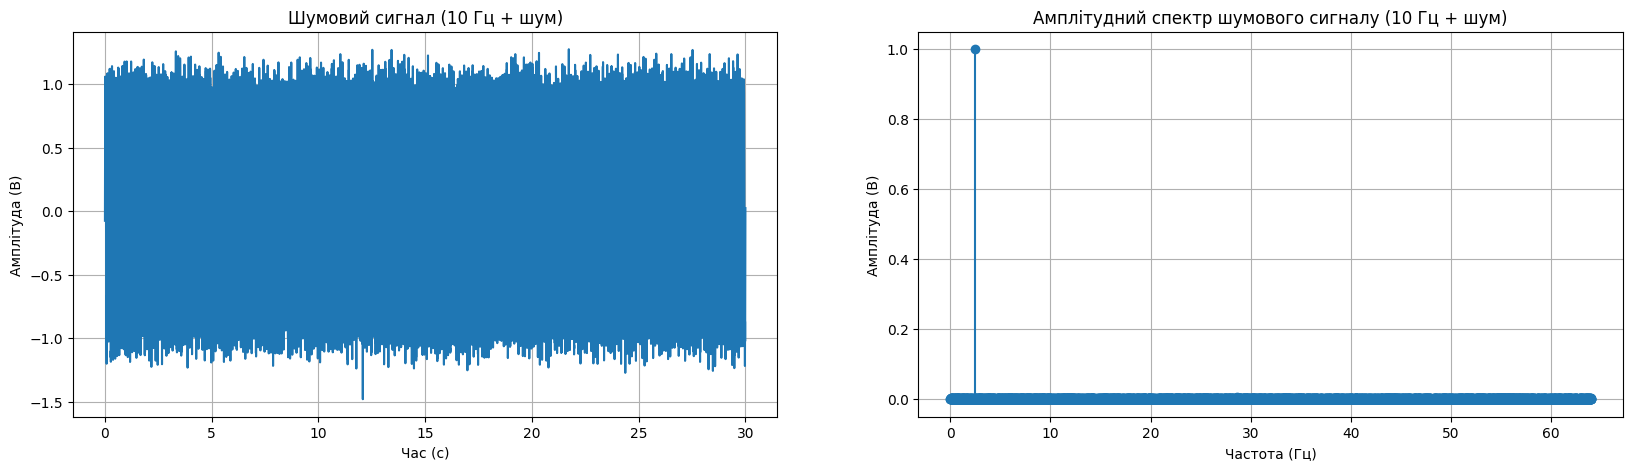

In [19]:
freqs_noised, amplitudes_noised = fft(sin_noised, fs)
axes = plt.subplots(1, 2, figsize=(20, 5))[1]
axes[0].plot(time, sin_noised)
axes[0].set_title('Шумовий сигнал (10 Гц + шум)')
axes[0].set_xlabel('Час (с)')
axes[0].set_ylabel('Амплітуда (В)')
axes[0].grid(True)
axes[1].stem(freqs_noised, amplitudes_noised, basefmt=" ")
axes[1].set_title('Амплітудний спектр шумового сигналу (10 Гц + шум)')
axes[1].set_xlabel('Частота (Гц)')
axes[1].set_ylabel('Амплітуда (В)')
axes[1].grid(True)

### 6.1

In [20]:
stds = [0.5, 1, 2, 10]

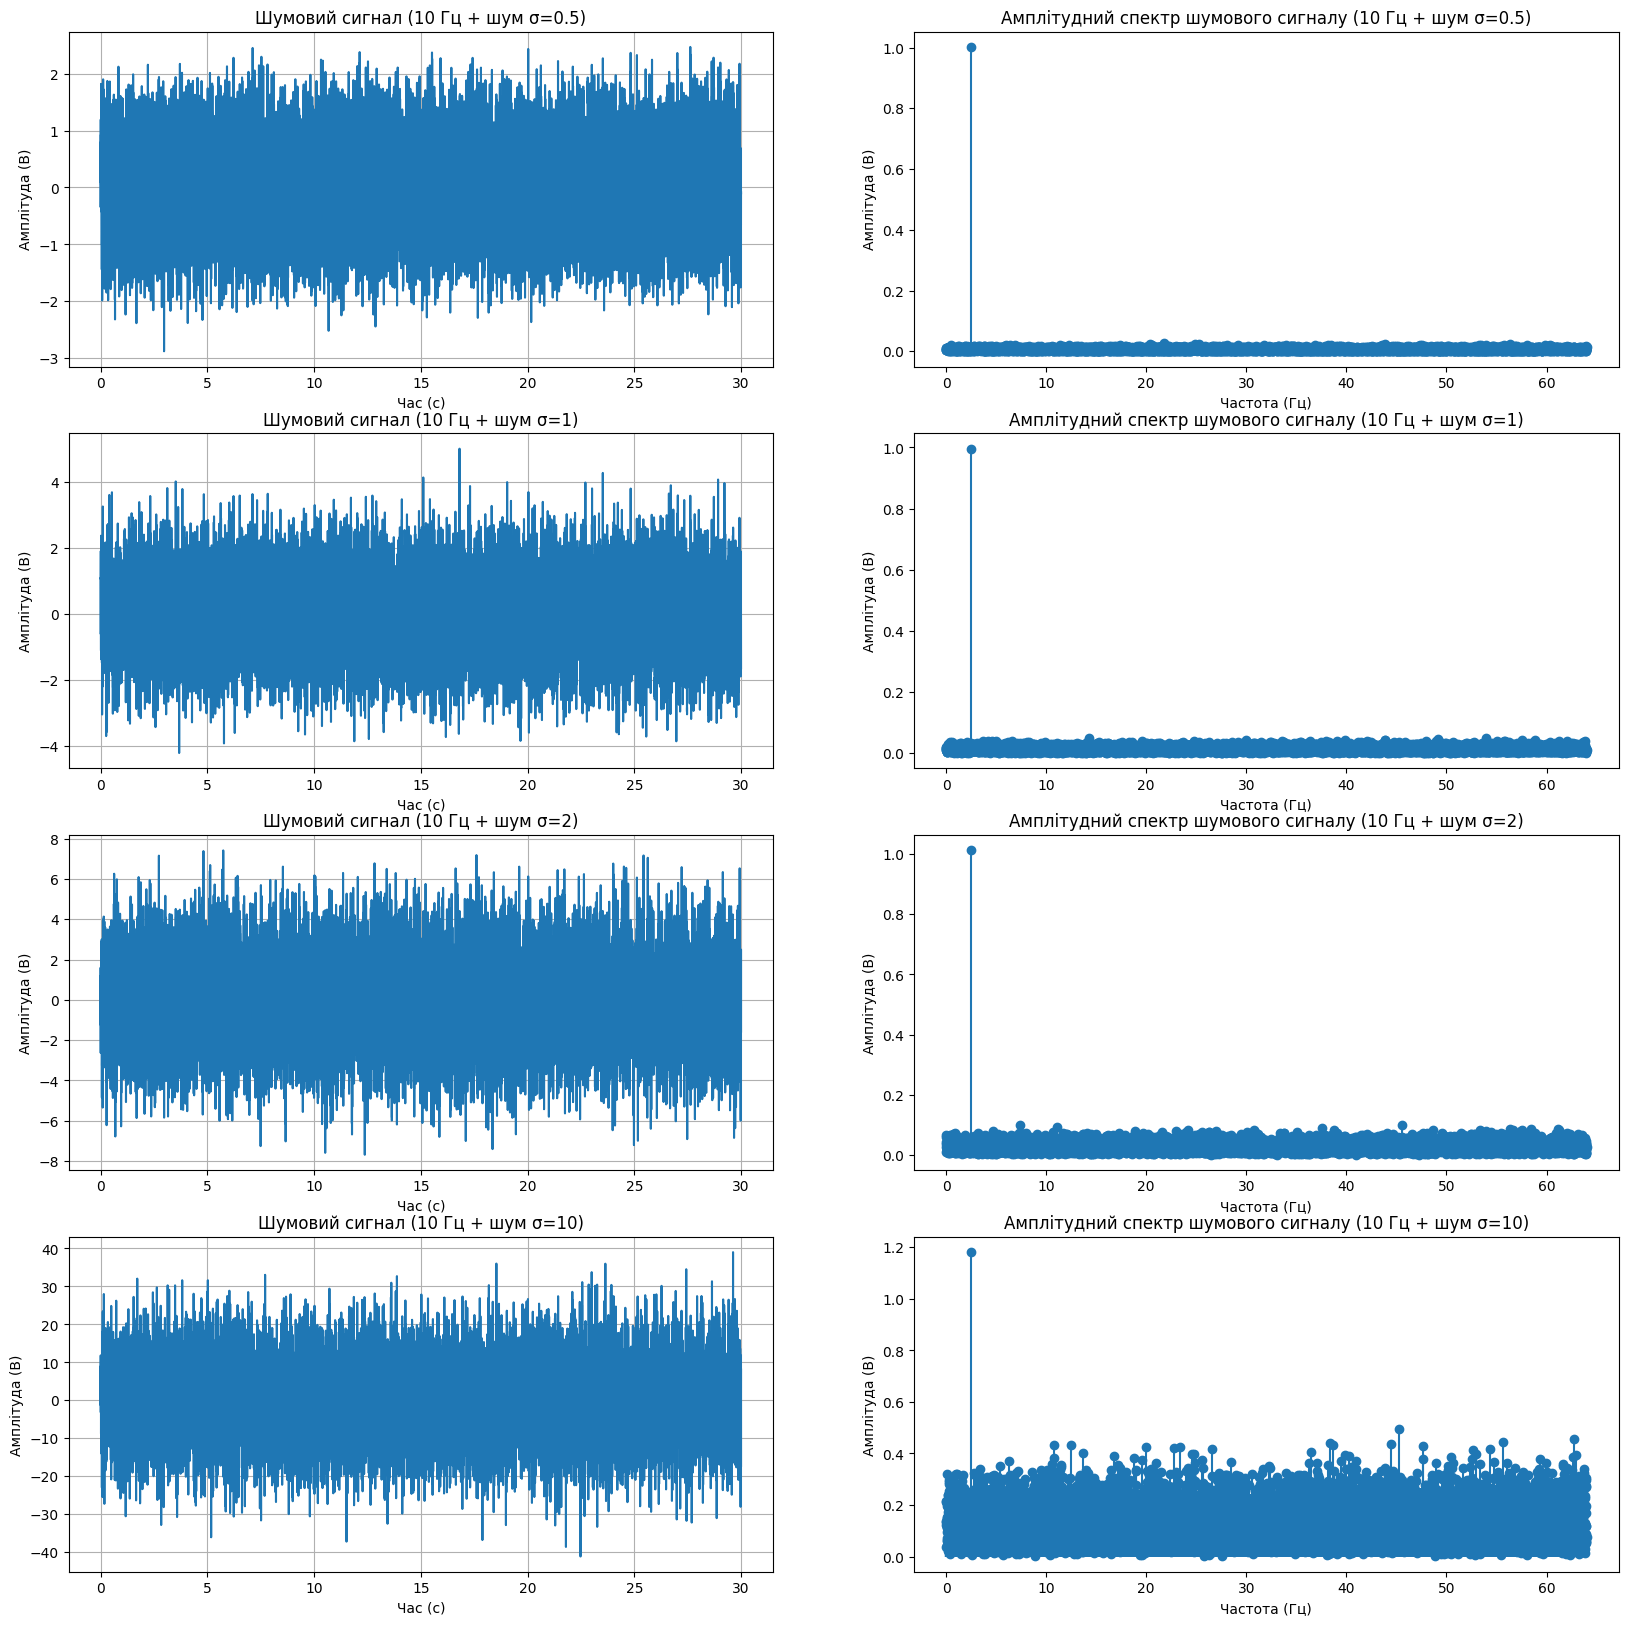

In [21]:
axes = plt.subplots(len(stds), 2, figsize=(20, 5 * len(stds)))[1]
for i, std_noise in enumerate(stds):
    sin_noised = sin + np.random.normal(0, std_noise, len(sin))
    freqs_noised, amplitudes_noised = fft(sin_noised, fs)

    axes[i, 0].plot(time, sin_noised)
    axes[i, 0].set_title(f'Шумовий сигнал (10 Гц + шум σ={std_noise})')
    axes[i, 0].set_xlabel('Час (с)')
    axes[i, 0].set_ylabel('Амплітуда (В)')
    axes[i, 0].grid(True)

    axes[i, 1].stem(freqs_noised, amplitudes_noised, basefmt=" ")
    axes[i, 1].set_title(f'Амплітудний спектр шумового сигналу (10 Гц + шум σ={std_noise})')
    axes[i, 1].set_xlabel('Частота (Гц)')
    axes[i, 1].set_ylabel('Амплітуда (В)')


З графіків видно, що шум дуже сильно впливає на перетворення Фур'є та спектральний аналіз.  

При малих значеннях дисперсії гаусівського шуму, на часову ряді можна візуально виділити патерни, що повторюється. Зі збільшенням сигми - це стає зробити складніше.  

Щодо амплітудного спектру, ситуація тут - краще. Добре видно першочерговий функцію - великий пік, найбільший серед усіх інших. Проте, зі збільшенням дисперсії - інші коефіцієнти починають важити більше, в той же час справжнє ground-truth значення - менше.  

Це дає розуміння, що спектральний аналіз є більш ефективним інструментом для аналізу зашумлених сигналів.

## Завдання 7

In [22]:
f = 20.5
amplitude = 1
T = 1
fs = 1000

In [23]:
time_7 = np.arange(0, T, 1/fs)
sin_20_5 = amplitude * np.sin(2 * np.pi * f * time_7)

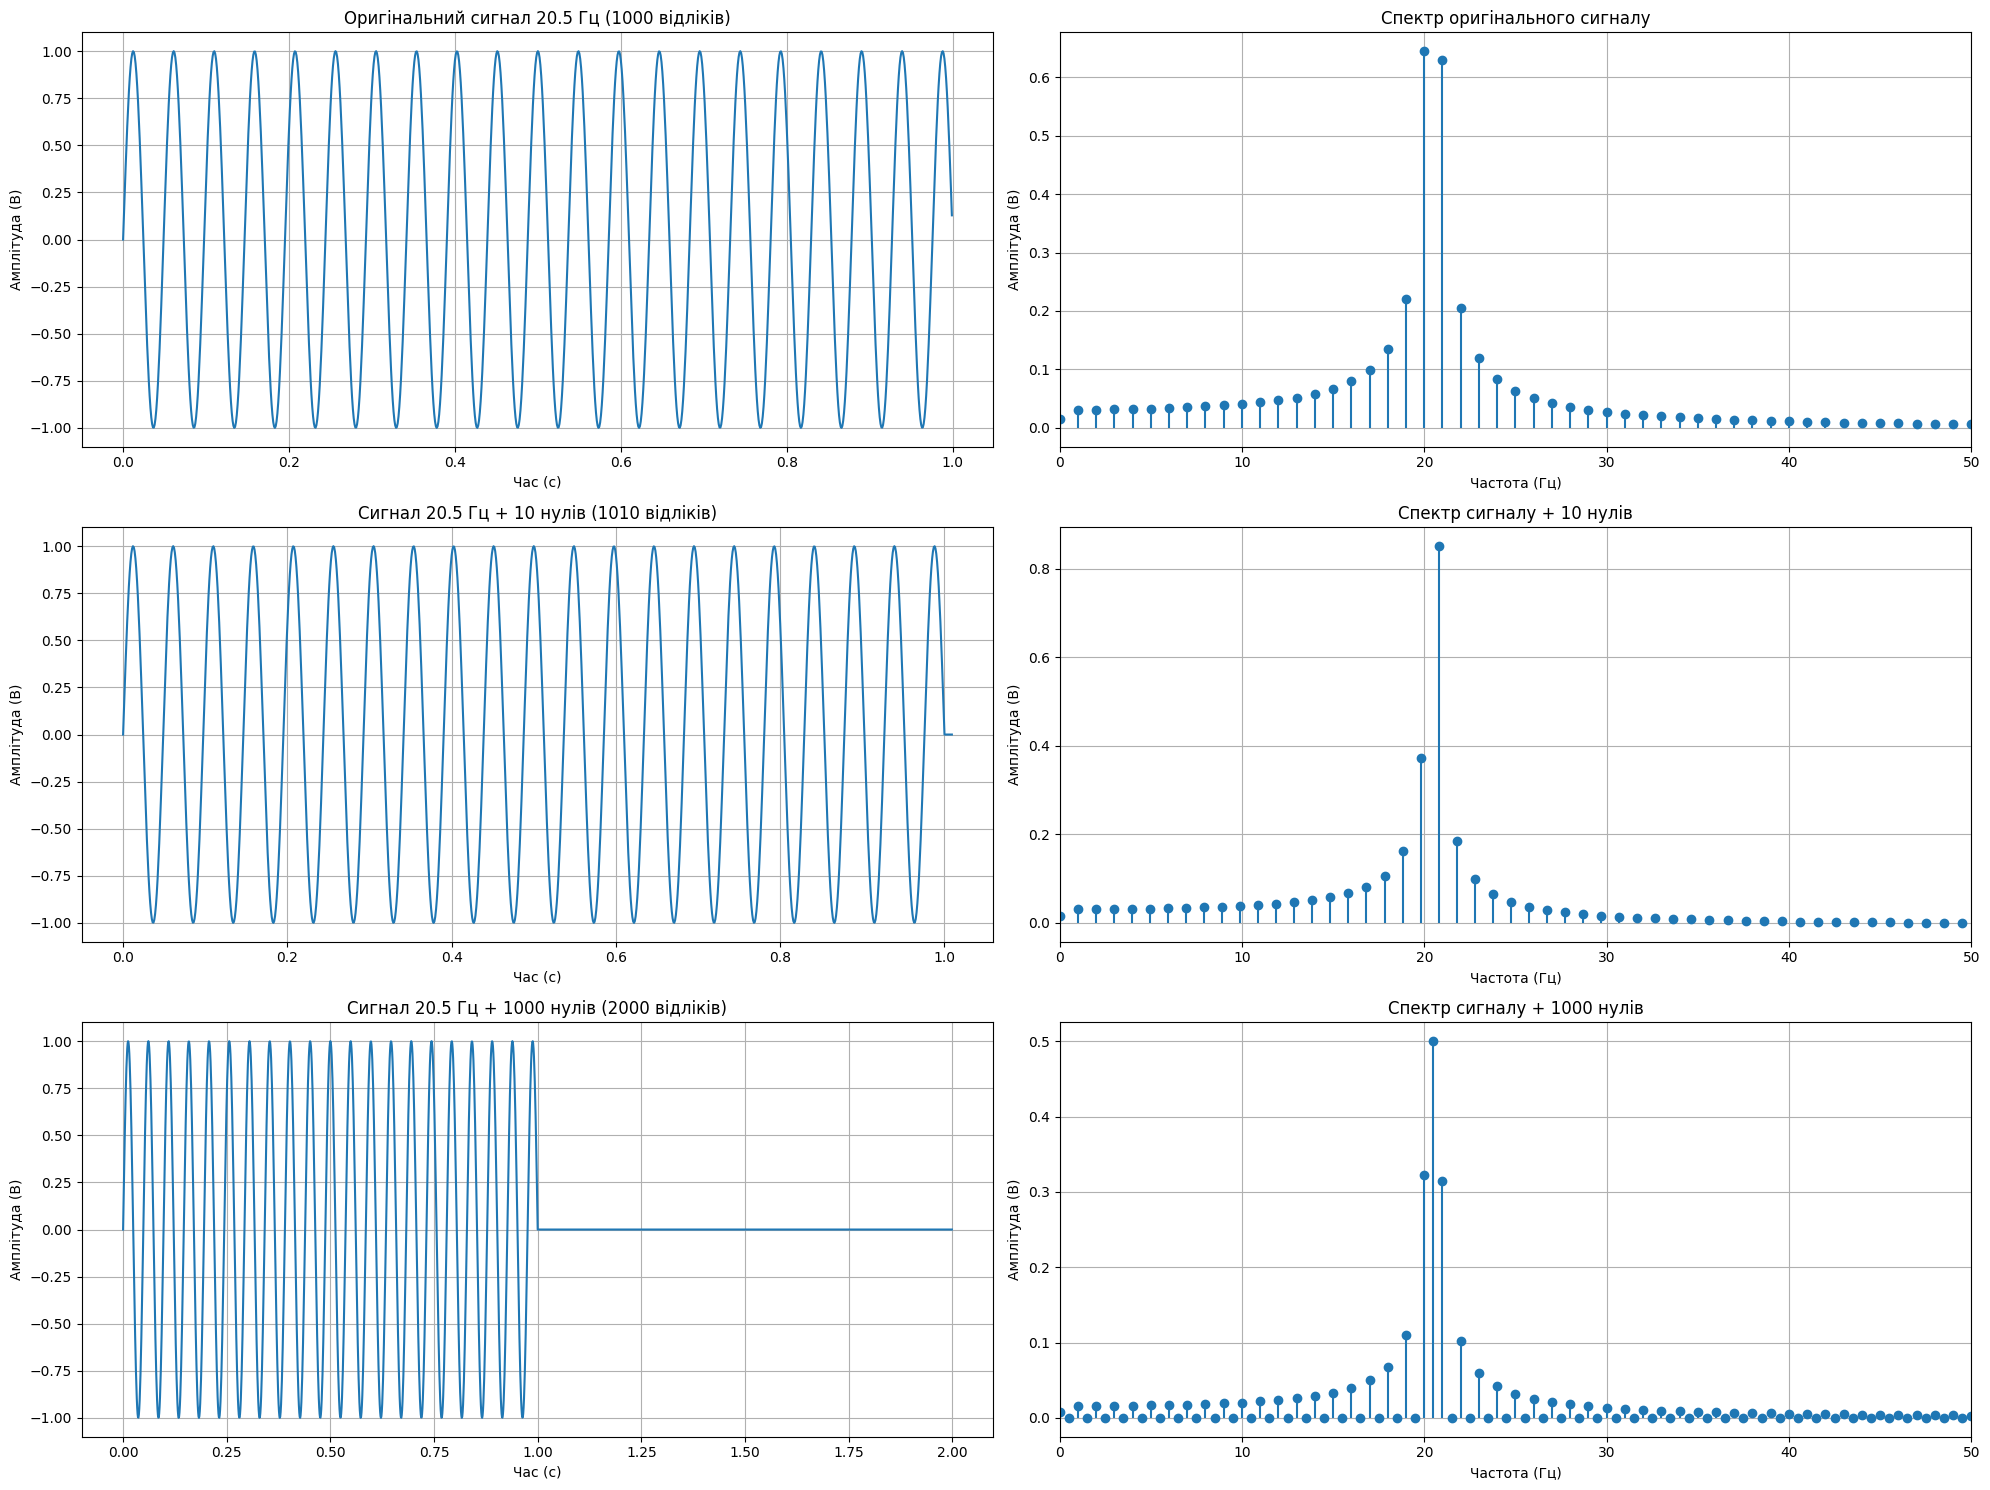

In [24]:
sin_original = sin_20_5.copy()
sin_10_zeros = np.concatenate([sin_20_5, np.zeros(10)])  # Додаємо 10 нулів
sin_1000_zeros = np.concatenate([sin_20_5, np.zeros(1000)])  # Додаємо 1000 нулів

freqs_original, amplitudes_original = fft(sin_original, fs)
freqs_10_zeros, amplitudes_10_zeros = fft(sin_10_zeros, fs)
freqs_1000_zeros, amplitudes_1000_zeros = fft(sin_1000_zeros, fs)

fig, axes = plt.subplots(3, 2, figsize=(20, 15))

axes[0, 0].plot(time_7, sin_original)
axes[0, 0].set_title('Оригінальний сигнал 20.5 Гц (1000 відліків)')
axes[0, 0].set_xlabel('Час (с)')
axes[0, 0].set_ylabel('Амплітуда (В)')
axes[0, 0].grid(True)

axes[0, 1].stem(freqs_original, amplitudes_original, basefmt=" ")
axes[0, 1].set_title('Спектр оригінального сигналу')
axes[0, 1].set_xlabel('Частота (Гц)')
axes[0, 1].set_ylabel('Амплітуда (В)')
axes[0, 1].set_xlim(0, 50)
axes[0, 1].grid(True)

time_10 = np.arange(0, len(sin_10_zeros)/fs, 1/fs)
axes[1, 0].plot(time_10, sin_10_zeros)
axes[1, 0].set_title('Сигнал 20.5 Гц + 10 нулів (1010 відліків)')
axes[1, 0].set_xlabel('Час (с)')
axes[1, 0].set_ylabel('Амплітуда (В)')
axes[1, 0].grid(True)

axes[1, 1].stem(freqs_10_zeros, amplitudes_10_zeros, basefmt=" ")
axes[1, 1].set_title('Спектр сигналу + 10 нулів')
axes[1, 1].set_xlabel('Частота (Гц)')
axes[1, 1].set_ylabel('Амплітуда (В)')
axes[1, 1].set_xlim(0, 50)
axes[1, 1].grid(True)

time_1000 = np.arange(0, len(sin_1000_zeros)/fs, 1/fs)
axes[2, 0].plot(time_1000, sin_1000_zeros)
axes[2, 0].set_title('Сигнал 20.5 Гц + 1000 нулів (2000 відліків)')
axes[2, 0].set_xlabel('Час (с)')
axes[2, 0].set_ylabel('Амплітуда (В)')
axes[2, 0].grid(True)

axes[2, 1].stem(freqs_1000_zeros, amplitudes_1000_zeros, basefmt=" ")
axes[2, 1].set_title('Спектр сигналу + 1000 нулів')
axes[2, 1].set_xlabel('Частота (Гц)')
axes[2, 1].set_ylabel('Амплітуда (В)')
axes[2, 1].set_xlim(0, 50)
axes[2, 1].grid(True)

plt.tight_layout()
plt.show()


При різній заповненості нулями, ефект спектрального розтікання відчувається по різному. Зі збільшенням кількості нулів, розтікання стає більш плавним. Де-факто амплітудний графік інтерполюється.  

На перший погляд може здаватися, що доповнення нулями покращує роздільну здатність (пік стає гострішим), проте це не так. Справжня роздільна здатність визначається лише ненульовим сигналом. Доповнення покращує візуалізацію, інтерполює амплітудний графік.

## Завдання 8

In [25]:
T = 5
fs = 128
f = 10
time = np.arange(0, T, 1/fs)
cool_signal = np.sin(2 * np.pi * f * time)

In [26]:
cool_signal_fft = np.fft.fft(cool_signal)
cool_signal_restored = np.fft.ifft(cool_signal_fft)

In [27]:
np.std(cool_signal_restored - cool_signal)

np.float64(1.9876331200561135e-16)

Можна побачити, що з'явилася мала похибка. Це все - через нестабільність FP-операцій. За теорією, FFT є оборненою трансформацією, і iFFT має повертати початковий часовий ряд.

c:\Users\basys\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\basys\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


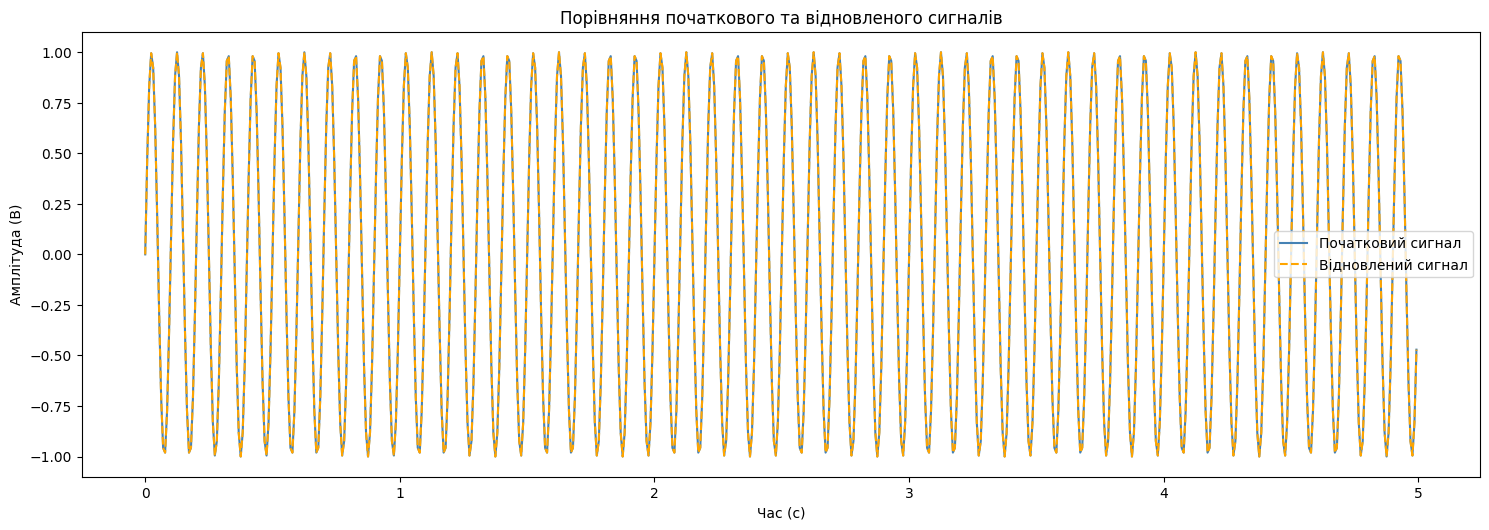

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(time, cool_signal, color='steelblue',  label='Початковий сигнал')
plt.title("Порівняння початкового та відновленого сигналів")
plt.xlabel("Час (с)")
plt.ylabel("Амплітуда (В)")
plt.plot(time, cool_signal_restored, color='orange', linestyle='--', label='Відновлений сигнал')

plt.legend()
plt.tight_layout()
plt.show()

Це підтверджує обрахунки вище -- сигнал не змінюється після FFT.

## Завдання 9

Визначио функцію, що буде повертати амплітудний та фазові спектри, та при передачі флажка -- малювати графіки.

In [29]:
def get_amplitude_phase_spectra(signal, sr, start_time, end_time, plot=True):
    max_time = len(signal) / sr
    if start_time < 0 or end_time > max_time or start_time >= end_time:
        raise ValueError
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    fragment = signal[start_sample:end_sample]

    N = len(fragment)

    fft_vals = np.fft.fft(fragment)
    freqs = np.fft.fftfreq(N, 1/sr)[:N//2]

    amplitudes = np.abs(fft_vals)[:N//2] / (N / 2)
    amplitudes[0] /= 2

    phases = np.unwrap(np.angle(fft_vals))[:N//2]


    if plot:
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 1, 1)
        plt.stem(freqs, amplitudes, basefmt=" ")
        plt.title('Амплітудний спектр')
        plt.xlabel('Частота (Гц)')
        plt.ylabel('Амплітуда (В)')
        plt.grid()

        plt.subplot(2, 1, 2)
        plt.plot(freqs, phases, color='purple')
        plt.title('Фазовий спектр')
        plt.xlabel('Частота (Гц)')
        plt.ylabel('Фаза (радіани)')
        plt.grid()

        plt.tight_layout()
        plt.show()

    return freqs, amplitudes, phases

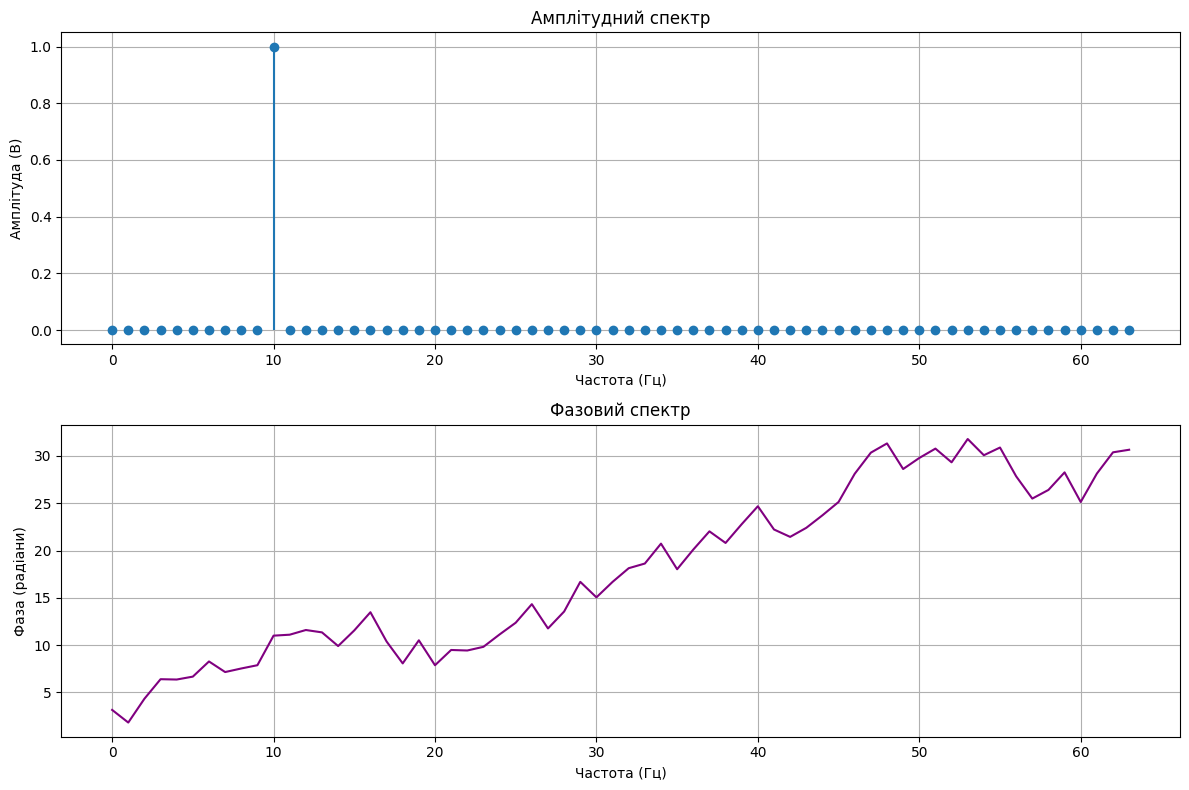

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.]),
 array([3.77036616e-17, 1.57444534e-16, 1.45364161e-16, 1.68357656e-16,
        1.35620162e-16, 6.50356603e-17, 2.42367649e-16, 8.16686893e-17,
        2.46638729e-16, 3.58339953e-16, 1.00000000e+00, 4.48852315e-16,
        1.65998213e-16, 1.68390137e-16, 1.04243088e-16, 1.71052639e-16,
        1.93364061e-16, 1.30898787e-16, 1.49350327e-16, 2.42853217e-16,
        4.53324700e-17, 1.71496645e-16, 4.16396110e-17, 3.85637918e-16,
        5.99352707e-16, 3.44924356e-16, 1.03637179e-16, 2.25636520e-16,
        1.08433977e-16, 5.47409778e-17, 4.57991241e-17, 1.53539555e-16,
        1.02685926e-16, 7.02367659e-17, 7.63482001e-17, 2.0930

In [30]:
get_amplitude_phase_spectra(cool_signal, fs, 0, 1)

## Завдання 10

In [31]:
cool_song, sr = sf.read('data/music/cool_song.mp3')
cool_song = np.mean(cool_song, axis=1)
cool_song = cool_song[:sr * 10]

In [32]:
sr_resampled = 8000

In [33]:
cool_song_8kHz = resample(cool_song, len(cool_song) * sr_resampled // sr)

In [34]:
freqs_8k, amps_8k = fft(cool_song_8kHz, sr_resampled)

In [35]:
freqs_40k, amps_40k = fft(cool_song, sr)

In [36]:
power_amps = amps_40k ** 2
power_amps_8k = amps_8k ** 2

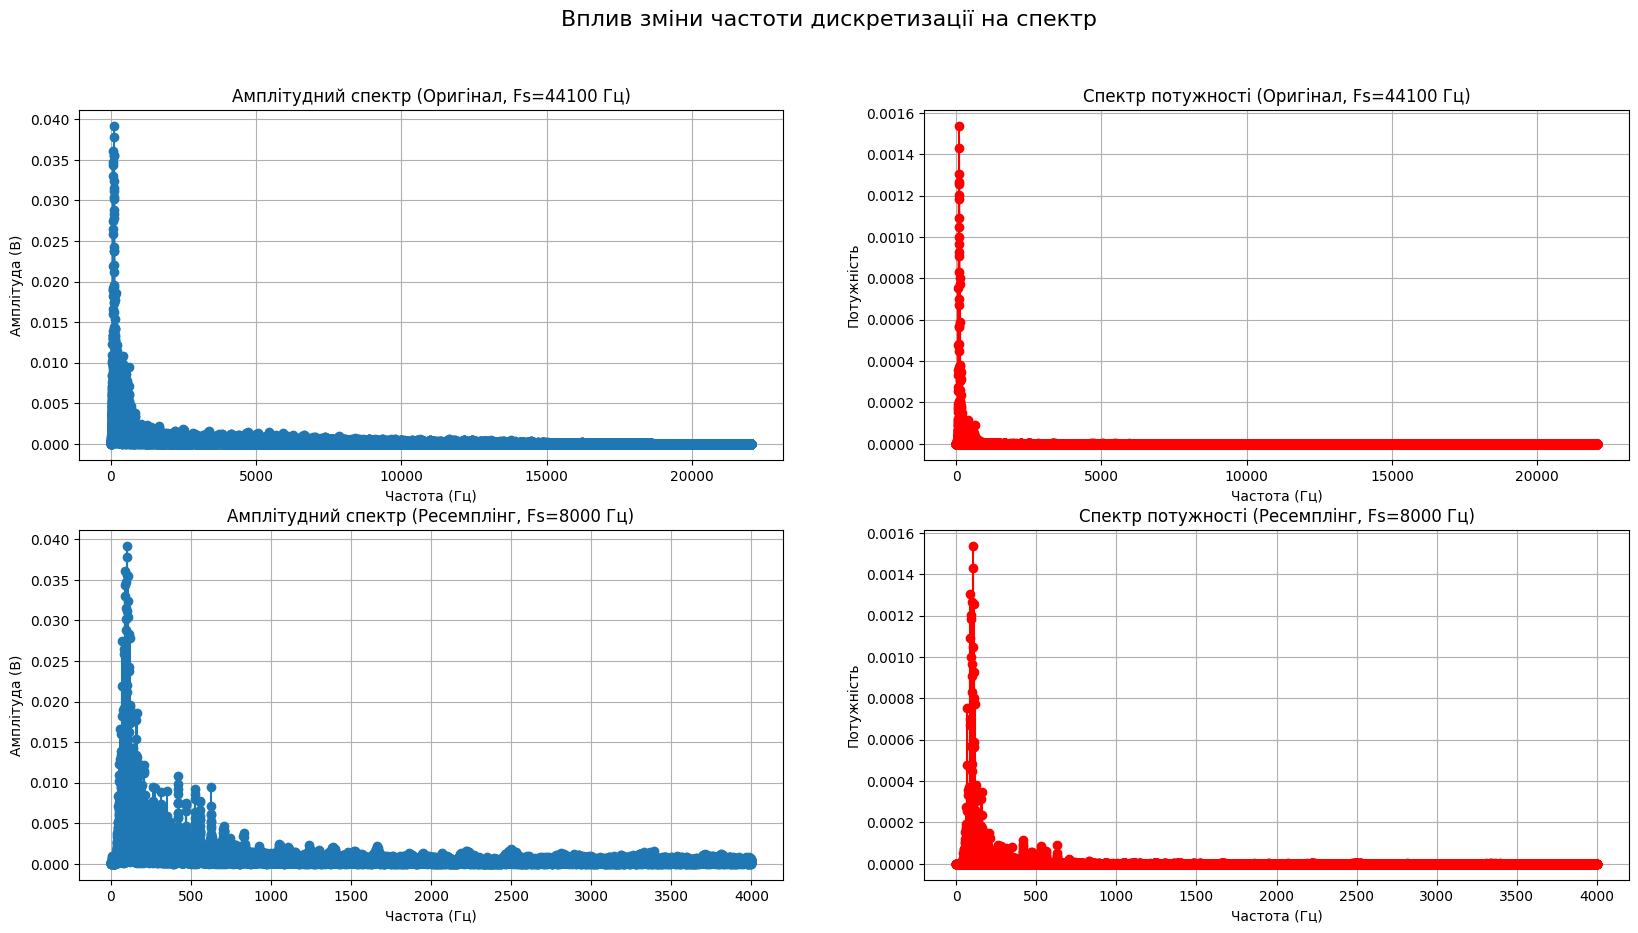

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Вплив зміни частоти дискретизації на спектр', fontsize=16)

axes[0, 0].stem(freqs_40k, amps_40k, basefmt=" ")
axes[0, 0].set_title(f'Амплітудний спектр (Оригінал, Fs={sr} Гц)')
axes[0, 0].set_xlabel('Частота (Гц)')
axes[0, 0].set_ylabel('Амплітуда (В)')
axes[0, 0].grid(True)

axes[0, 1].stem(freqs_40k, power_amps, basefmt=" ", linefmt='r-', markerfmt='ro')
axes[0, 1].set_title(f'Спектр потужності (Оригінал, Fs={sr} Гц)')
axes[0, 1].set_xlabel('Частота (Гц)')
axes[0, 1].set_ylabel('Потужність')
axes[0, 1].grid(True)

axes[1, 0].stem(freqs_8k, amps_8k, basefmt=" ")
axes[1, 0].set_title(f'Амплітудний спектр (Ресемплінг, Fs={sr_resampled} Гц)')
axes[1, 0].set_xlabel('Частота (Гц)')
axes[1, 0].set_ylabel('Амплітуда (В)')
axes[1, 0].grid(True)

axes[1, 1].stem(freqs_8k, power_amps_8k, basefmt=" ", linefmt='r-', markerfmt='ro')
axes[1, 1].set_title(f'Спектр потужності (Ресемплінг, Fs={sr_resampled} Гц)')
axes[1, 1].set_xlabel('Частота (Гц)')
axes[1, 1].set_ylabel('Потужність')
axes[1, 1].grid(True)

Форма спектру та потужності обох сигналів є дуже схожими. Проте можна побачити, що графік з 44.1КГц частотою дискретизації виглядає більш "гладко".  

При зменшені частоти, зменшилися ширина спектру (з 22К до 4К). Також, процес ресемплінгу - lossy, тому було втрачено багато (високочастотної) інформації, а отже і ресемплений амплітудний спектр не покриває всієї першочергової аудіодорожки. 